Rejection Sampling
Rejection sampling is a basic Monte Carlo technique to generate observations from a specified
distribution with probability density function (pdf) f(x). In practice, it is used to
draw random variables from a target distribution, f(x), when directly sampling from that
distribution is difficult. The basic idea is to instead sample from a reference distribution,
g(x), which a) is easy to draw from and b) satisfies the condition that g(x) > 0 whenever
f(x) > 0, and to then selectively accept samples such that sampling from f is achieved.
The basic rejection sampling algorithm is the following:

Begin with a reference distribution, g and a scalar M such that f(x) < Mg(x) for all
x.
• Until a specified number of samples is achieved:
1. Sample a candidate, xc, from g(x) and a value u from a uniform distribution over
[0, 1] (Hint: See scipy.stats.uniform)
2. if u < f(x_c)
M g(x_c)
then accept xc as a sample from f(x), else reject xc.

# Part a

In [2]:
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import math

In [17]:
norm.rvs()

-0.10396372109857019

In [21]:
norm.rvs(size = 3)[0]

-1.6838231466346709

In [61]:
#############################################################
###--------------- Target Distribution -------------------###
#############################################################

def target_func(x):
    '''
    Input: scalar
    Description: a sample target function
    '''
    return(x/5)

def oneD_rej_sample(target_dist, ref_dist, sample_size, m):
    '''
    Input: 
        target_dist - target distribution
        ref_dist - reference distribution
        sample_size - desired sample size
        m - scalar m such that f(x) < m g(x)
    Output: a list of samples, prints the value of m, and the percentage of samples that were accepted
    Description:
    '''
    samples = []      # Initializing samples
    rejects = []      # Initializing rejected samples
    
    ref = ref_dist
    tar = target_dist
    n = sample_size
    
    while len(samples) < n:
        x = ref.rvs(size = 1)[0]
        u = scipy.stats.uniform.rvs(size=1)[0]
        #------- Rejection Sampling Step --------#
        if u < (tar(x)/float(m*ref.pdf(x))): 
            samples.append(x)
        else:
            rejects.append(x)
        
        perc = 100*(len(samples)/(len(samples) + len(rejects)))
        
    print("samples: \n", samples, "\n", "m = ", m, "\n", "% accepted", perc, "%")
    return(samples)
    
result = oneD_rej_sample(target_func, scipy.stats.norm(0,1), 20, 2)
    

samples: 
 [0.94099875252272314, 1.5271589533432157, 1.249926163535515, 1.5063963374459566, 0.67152991901960957, 1.5741151562453777, 1.1078007161341161, 1.3312180206226383, 1.6483135125427653, 0.92974775422548173, 0.57295123280821592, 1.7881041870091745, 1.50341099182834, 0.62432508718235824, 1.9407636803853168, 1.1376355633267619, 1.3375063973948089, 1.3292643477303723, 1.0213779479397145, 1.6965321717675705] 
 m =  2 
 % accepted 27.77777777777778 %


In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 3.,  0.,  2.,  2.,  2.,  3.,  3.,  2.,  2.,  1.]),
 array([ 0.57295123,  0.70973248,  0.84651372,  0.98329497,  1.12007621,
         1.25685746,  1.3936387 ,  1.53041995,  1.66720119,  1.80398244,
         1.94076368]),
 <a list of 10 Patch objects>)

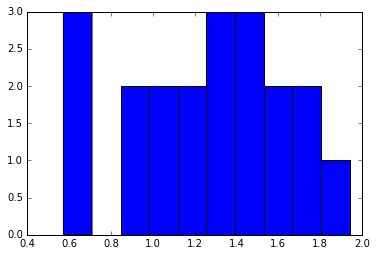

In [64]:
hist(result)

In [60]:
scipy.stats.norm(0,1).rvs()

-1.4242811012593402

In [54]:
scipy.stats.norm?

# Part b: 
The Laplace distribution (a.k.a. double exponential distribution) has the pdf
f(x) = 1
2b
exp
−
|x − µ|
b
!
(1)
Use your rejection sampler to draw a sample of size 1000 from the Laplace distribution
with parameters µ = 0, b = 1. Use a Cauchy distribution as the reference distribution.
Plot a histogram of your samples, over-plotting the true Laplace pdf. Use a
Kolmogorov-Smirnov test to test the hypothesis that your sample was drawn from a
Laplace(0,1) distribution.

In [86]:
def laplace(x):
    import math
    b=1
    mu=0
    return (1/float(2*b))*math.exp((-(math.fabs(x-mu))/b))

In [87]:
def target_func(x):
    '''
    Input: scalar
    Description: a sample target function - Laplace in this case
    '''
    ans = (1/2)*exp(-abs(x))
    return ans

False

In [72]:
scipy.stats.cauchy.rvs()

-0.76272565265240344

In [95]:
m = 2
laplacian_sample = oneD_rej_sample(target_func, scipy.stats.cauchy, 1000, m)

samples: 
 [0.58606514417124966, 1.0479576237141695, 0.47161893085942524, -0.93131649921475246, -0.0026062074286077961, 0.99709635842283084, -3.0441148745389452, 0.5688422849115301, -0.072939469092114753, 0.32362458270347999, 0.21409041876108775, -1.7669253441934576, -0.72548899102491826, 0.29684272796245326, -0.46184191995648954, -0.33290223529859786, 0.4640058043231568, 0.21340704808077163, 0.92114366364144973, 0.22751391364278833, 1.3909522465224049, 2.1002606888666935, 5.7923155386895075, 3.7522497052755823, 0.2759599922199904, -0.054787826494633943, 1.4471594798916709, -1.8792615305897422, -0.33280565555603731, 1.0857479188472983, 0.5633029025760562, -1.1023783183448959, -0.59367367480242472, 1.3792247376740658, -1.9812401477967598, 0.43185988550319743, -0.76657643410782328, -0.074699203550846416, 0.64894807151831035, -0.19736959404481286, -0.23401710907449233, 0.69631216726317258, 1.0502882655567618, -2.8452018146781248, -0.40644343631212093, -0.49253258945829742, -0.672065655750

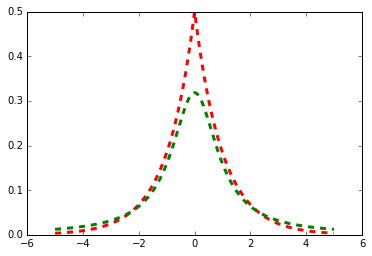

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  6.3944969387e-59


In [101]:
#over plot true Laplace pdf
x = np.arange(-5,5,.005)
laplace_pdf = np.arange(-5,5,.005)
cauchy_pdf = np.arange(-5,5, .005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
    cauchy_pdf[i]= scipy.stats.cauchy.pdf(float(x[i]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, laplace_pdf, 'r--', linewidth=3)
ax.plot(x, cauchy_pdf, 'g--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(cauchy_pdf, laplace_pdf)
print("pvalue = ", pvalue)

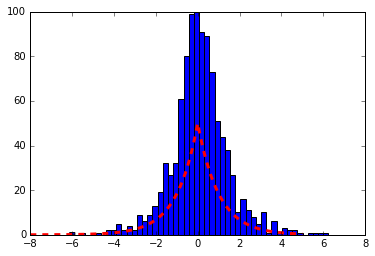

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  5.75963223171e-150


In [99]:
#plot histogram of samples
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(laplacian_sample,bins=50)

#over plot true Laplace pdf
x = np.arange(-8,5,.005)
laplace_pdf = np.arange(-8,5,.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,100*laplace_pdf, 'r--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(laplacian_sample, laplace_pdf)
print("pvalue = ", pvalue)


In [81]:
scipy.stats.laplace.pdf?